# Project Titanic

![Titanic](https://cafefcdn.com/203337114487263232/2023/7/3/dt6rd9-168794189980444550528-1688002071245-1688002071386463675400-16883921272271781744944-1688427759024-1688427759243994796231.jpg)


### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read train_data and test_data

In [2]:
df_train = pd.read_csv("./titanic/train.csv")
df_test = pd.read_csv("./titanic/test.csv")

In [3]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
name = df_train["Name"].astype("category")
print(len(name))

891


## Data Cleaning for train data

### 1. Feature Classification : Numberical and Categorical


* Categorical include : `nominal`, `ordinal`, `ratio`, `interval`
* Numberical include : `discrete`, `continous`, `timeseries`

In [7]:
df_train_1 = df_train.copy()

In [8]:
Categorical_feature = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]

In [9]:
def convert_to_categrical(df, Categorical_feature):
    for feature in Categorical_feature :
        df[feature] = df[feature].astype("category")

convert_to_categrical(df_train_1, Categorical_feature)


In [10]:
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    category
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(6), float64(2), int64(1), object(3)
memory usage: 48.3+ KB


In [11]:
df_train_1.describe(include= "category")

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


In [12]:
df_train_1.describe()

,PassengerId,Age,Fare
count,891.000000,714.000000,891.000000
mean,446.000000,29.699118,32.204208
std,257.353842,14.526497,49.693429
min,1.000000,0.420000,0.000000
25%,223.500000,20.125000,7.910400
50%,446.000000,28.000000,14.454200
75%,668.500000,38.000000,31.000000
max,891.000000,80.000000,512.329200


### 2. Exploratory Data Analysis

In [13]:
df_train_1["Ticket"].value_counts(normalize='True').to_frame()

,Ticket
347082,0.007856
CA. 2343,0.007856
1601,0.007856
3101295,0.006734
CA 2144,0.006734
...,...
9234,0.001122
19988,0.001122
2693,0.001122
PC 17612,0.001122


* EDA for categorical data

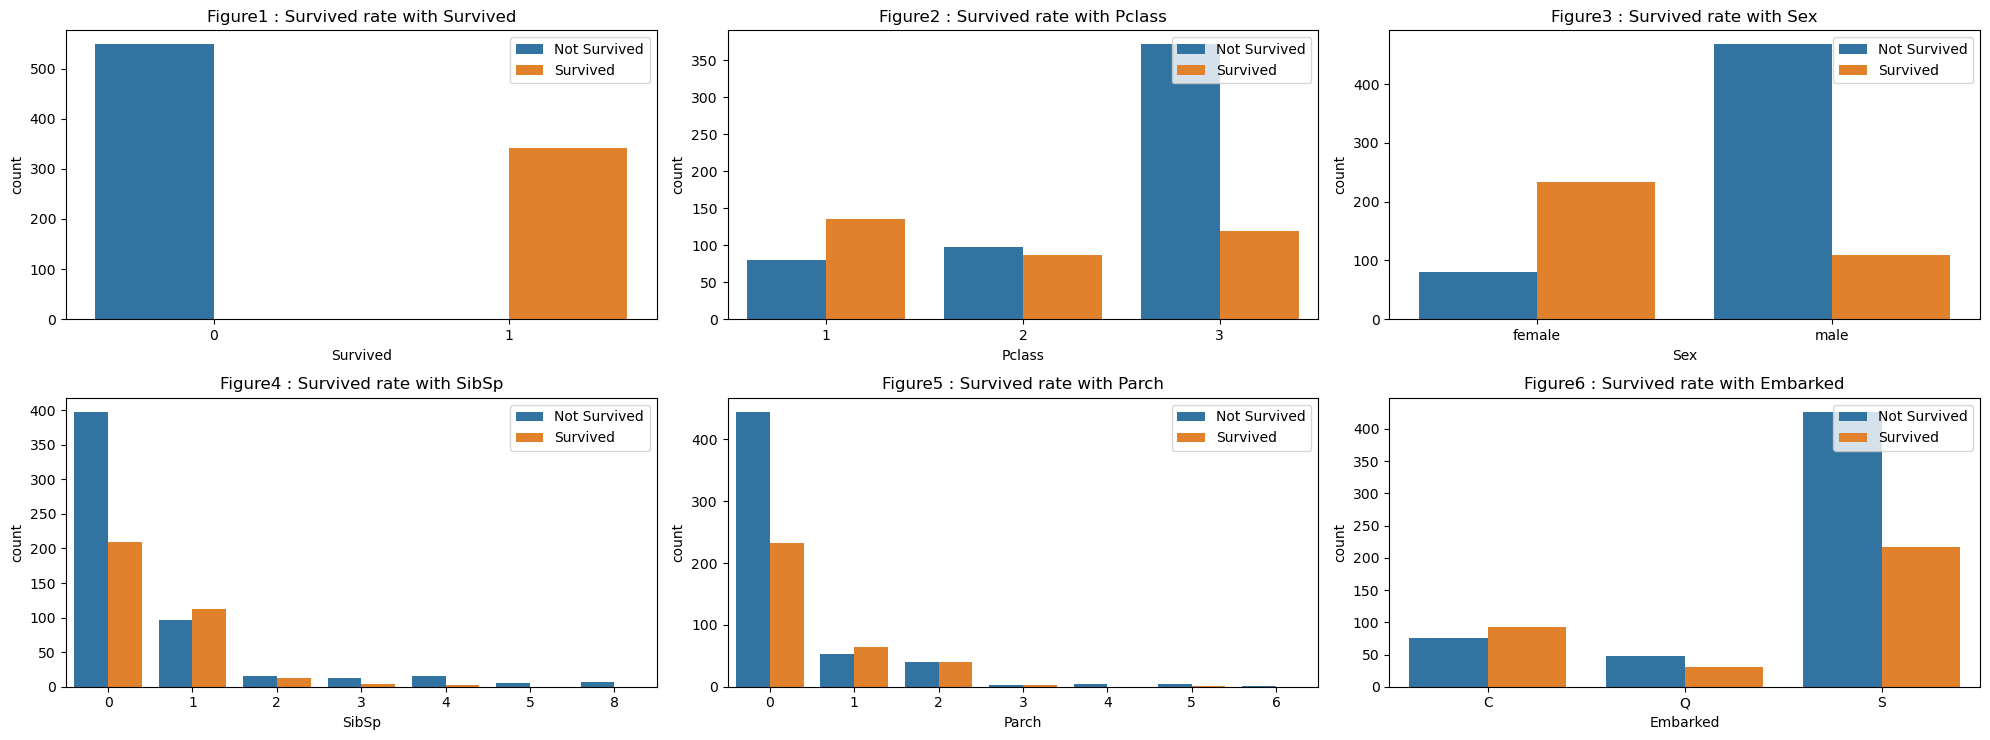

In [14]:
fig, ax = plt.subplots(2,3, figsize = (20, 7.5))
count = 0
for row in range(0, 2) :
    for col in range(0, 3):
        ax_index = ax[row,col]
        sns.countplot(data= df_train_1, x= Categorical_feature[count], hue= "Survived", ax= ax_index)
        ax_index.set_title(f"Figure{count + 1} : Survived rate with {Categorical_feature[count]}")
        ax_index.legend(title= '', loc = "upper right", labels = ["Not Survived", "Survived"])
        count = count + 1
plt.tight_layout()  # Sắp xếp các subplot một cách hợp lý
plt.show()

* EDA for numberical data

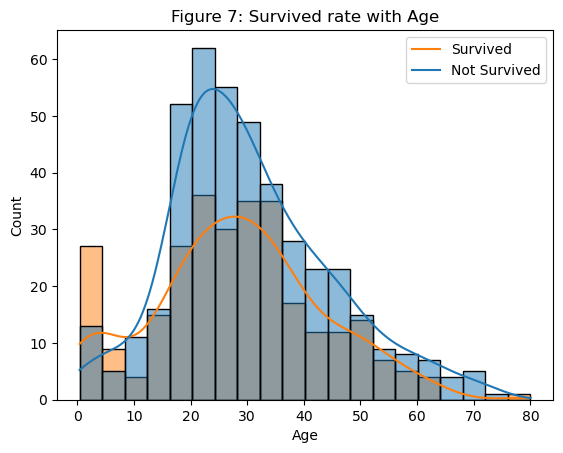

In [15]:
fig, ax = plt.subplots()
sns.histplot(data=df_train_1, x="Age", hue="Survived", kde= True, ax= ax)
ax.set_title("Figure 7: Survived rate with Age")
ax.legend(title="", loc="upper right", labels=["Survived", "Not Survived"])
plt.show()

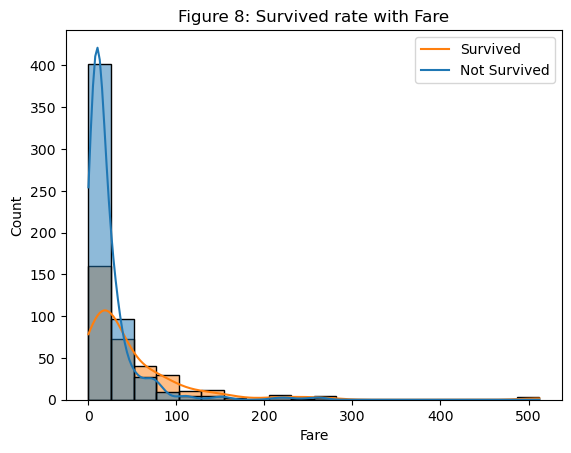

In [16]:
fig, ax = plt.subplots()
sns.histplot(data=df_train_1, x="Fare", hue="Survived",bins= 20, kde=True, ax=ax)
ax.set_title("Figure 8: Survived rate with Fare")
ax.legend(title="", loc="upper right", labels=["Survived", "Not Survived"])
plt.show()

## 3. Data Preprocessing

In [17]:
df_train_2 = df_train_1.copy()

In [18]:
df_train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    category
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(6), float64(2), int64(1), object(3)
memory usage: 48.3+ KB


* 3.1. Feature selection

In [19]:
drop_data = ["PassengerId", "Name", "Ticket"]

In [20]:
df_train_2.drop(drop_data, axis= 1, inplace= True)

In [21]:
df_train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    category
 5   Parch     891 non-null    category
 6   Fare      891 non-null    float64 
 7   Cabin     204 non-null    object  
 8   Embarked  889 non-null    category
dtypes: category(6), float64(2), object(1)
memory usage: 27.4+ KB


* 3.2. Handel missing data

In [22]:
df_train_2['Age'].fillna(df_train_2["Age"].median(), inplace= True)
df_train_2['Cabin'].fillna(df_train_2["Cabin"].mode()[0], inplace= True)
df_train_2['Embarked'].fillna(df_train_2["Embarked"].mode()[0], inplace= True)

In [23]:
df_train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    category
 5   Parch     891 non-null    category
 6   Fare      891 non-null    float64 
 7   Cabin     891 non-null    object  
 8   Embarked  891 non-null    category
dtypes: category(6), float64(2), object(1)
memory usage: 27.4+ KB


* 3.3. Check Outliers

In [24]:
x = df_train_2.drop(["Survived"], axis= 1)

In [25]:
y = df_train_2["Survived"]

In [26]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    891 non-null    category
 1   Sex       891 non-null    category
 2   Age       891 non-null    float64 
 3   SibSp     891 non-null    category
 4   Parch     891 non-null    category
 5   Fare      891 non-null    float64 
 6   Cabin     891 non-null    object  
 7   Embarked  891 non-null    category
dtypes: category(5), float64(2), object(1)
memory usage: 26.4+ KB


<Axes: >

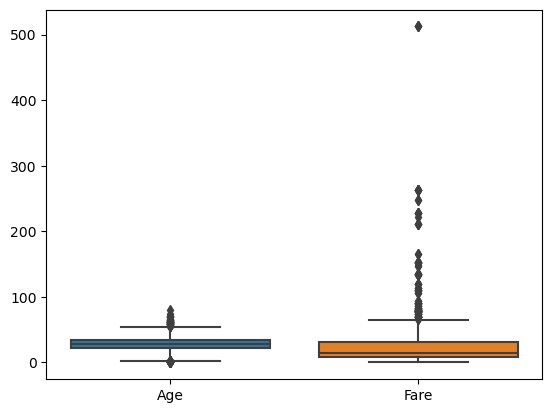

In [27]:
sns.boxplot(data= x)

* 3.4 Data Encoding

* Encode Independent Variable X

In [28]:
Categorical_feature

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [29]:
categotical_encode = Categorical_feature[1:]
categotical_encode

['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [30]:
numberical = ["Age", "Fare"]
numberical

['Age', 'Fare']

In [31]:
Other_encode = ["Cabin"]
Other_encode

['Cabin']

In [32]:
import category_encoders as ce
one_hot = ce.OneHotEncoder(cols= categotical_encode, return_df= True)
one_hot.fit(x)
x = one_hot.transform(x)

In [33]:
BaseN_encode = ce.BaseNEncoder(cols= Other_encode, return_df= True, base= 8)
BaseN_encode.fit(x)
x = BaseN_encode.transform(x)

In [34]:
x

,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,Age,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Parch_5,Parch_6,Parch_7,Fare,Cabin_0,Cabin_1,Cabin_2,Embarked_1,Embarked_2,Embarked_3
0,1,0,0,1,0,22.0,1,0,0,0,...,0,0,0,7.2500,0,0,1,1,0,0
1,0,1,0,0,1,38.0,1,0,0,0,...,0,0,0,71.2833,0,0,2,0,1,0
2,1,0,0,0,1,26.0,0,1,0,0,...,0,0,0,7.9250,0,0,1,1,0,0
3,0,1,0,0,1,35.0,1,0,0,0,...,0,0,0,53.1000,0,0,3,1,0,0
4,1,0,0,1,0,35.0,0,1,0,0,...,0,0,0,8.0500,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,1,0,27.0,0,1,0,0,...,0,0,0,13.0000,0,0,1,1,0,0
887,0,1,0,0,1,19.0,0,1,0,0,...,0,0,0,30.0000,2,2,2,1,0,0
888,1,0,0,0,1,28.0,1,0,0,0,...,0,0,0,23.4500,0,0,1,1,0,0
889,0,1,0,1,0,26.0,0,1,0,0,...,0,0,0,30.0000,2,2,3,0,1,0


In [35]:
x.shape

(891, 27)

* Encode Dependent Variable Y

In [36]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
label_encode.fit(y)
y = label_encode.transform(y)

In [37]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [38]:
y.shape

(891,)

* 3.5. Scaling Data

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
sc.fit(x)
x = sc.transform(x)

In [40]:
x

array([[ 0.90258736, -0.56568542, -0.51015154, ...,  0.61583843,
        -0.48204268, -0.30756234],
       [-1.10792599,  1.76776695, -0.51015154, ..., -1.62380254,
         2.0745051 , -0.30756234],
       [ 0.90258736, -0.56568542, -0.51015154, ...,  0.61583843,
        -0.48204268, -0.30756234],
       ...,
       [ 0.90258736, -0.56568542, -0.51015154, ...,  0.61583843,
        -0.48204268, -0.30756234],
       [-1.10792599,  1.76776695, -0.51015154, ..., -1.62380254,
         2.0745051 , -0.30756234],
       [ 0.90258736, -0.56568542, -0.51015154, ..., -1.62380254,
        -0.48204268,  3.25137334]])

* 3.6. Spliting Data

In [41]:
#x = x.values

In [42]:
x.shape, y.shape

((891, 27), (891,))

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

In [44]:
x_train.shape, y_train.shape

((712, 27), (712,))

In [45]:
x_val.shape, y_val.shape

((179, 27), (179,))

## Data Cleaning for Test Data

In [46]:
df_test_1 = df_test.copy()

In [47]:
df_test_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [48]:
df_test_1.drop(drop_data, axis= 1, inplace= True)

In [49]:
df_test_1.fillna(df_test_1["Age"].median(), inplace= True)
df_test_1.fillna(df_test_1["Fare"].median(), inplace= True)
df_test_1.fillna(df_test_1["Cabin"].mode()[0], inplace= True)

In [50]:
df_test_1.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [51]:
df_test_1 = one_hot.transform(df_test_1)
df_test_1 = BaseN_encode.transform(df_test_1)

In [52]:
df_test_1

,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,Age,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Parch_5,Parch_6,Parch_7,Fare,Cabin_0,Cabin_1,Cabin_2,Embarked_1,Embarked_2,Embarked_3
0,1,0,0,1,0,34.5,0,1,0,0,...,0,0,0,7.8292,0,0,0,0,0,1
1,1,0,0,0,1,47.0,1,0,0,0,...,0,0,0,7.0000,0,0,0,1,0,0
2,0,0,1,1,0,62.0,0,1,0,0,...,0,0,0,9.6875,0,0,0,0,0,1
3,1,0,0,1,0,27.0,0,1,0,0,...,0,0,0,8.6625,0,0,0,1,0,0
4,1,0,0,0,1,22.0,1,0,0,0,...,0,0,0,12.2875,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1,0,0,1,0,27.0,0,1,0,0,...,0,0,0,8.0500,0,0,0,1,0,0
414,0,1,0,0,1,39.0,0,1,0,0,...,0,0,0,108.9000,0,0,0,0,1,0
415,1,0,0,1,0,38.5,0,1,0,0,...,0,0,0,7.2500,0,0,0,1,0,0
416,1,0,0,1,0,27.0,0,1,0,0,...,0,0,0,8.0500,0,0,0,1,0,0


In [53]:
df_test_1 = sc.transform(df_test_1)

In [54]:
df_test_1

array([[ 0.90258736, -0.56568542, -0.51015154, ..., -1.62380254,
        -0.48204268,  3.25137334],
       [ 0.90258736, -0.56568542, -0.51015154, ...,  0.61583843,
        -0.48204268, -0.30756234],
       [-1.10792599, -0.56568542,  1.96020185, ..., -1.62380254,
        -0.48204268,  3.25137334],
       ...,
       [ 0.90258736, -0.56568542, -0.51015154, ...,  0.61583843,
        -0.48204268, -0.30756234],
       [ 0.90258736, -0.56568542, -0.51015154, ...,  0.61583843,
        -0.48204268, -0.30756234],
       [ 0.90258736, -0.56568542, -0.51015154, ..., -1.62380254,
         2.0745051 , -0.30756234]])

## Training Machine Learning Model

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

In [56]:
RF = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
RF.fit(x_train, y_train)
y_pred = RF.predict(x_val)


accuracy = accuracy_score(y_val, y_pred)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_val, y_pred, average='weighted')
print('Precision: %f' % precision)

recall = recall_score(y_val, y_pred, average='weighted')
print('Recall: %f' % recall)

f1 = f1_score(y_val, y_pred, average='weighted')
print('F1 score: %f' % f1)
print(classification_report(y_val, y_pred))

Accuracy: 0.810056
Precision: 0.805829
Recall: 0.810056
F1 score: 0.805061
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       120
           1       0.76      0.63      0.69        59

    accuracy                           0.81       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.81      0.81      0.81       179



In [57]:
LR1 = LogisticRegression(random_state=42, class_weight='balanced')
LR1.fit(x_train, y_train)
y_pred = LR1.predict(x_val)

accuracy = accuracy_score(y_val, y_pred)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_val, y_pred, average='weighted')
print('Precision: %f' % precision)


recall = recall_score(y_val, y_pred, average='weighted')
print('Recall: %f' % recall)

f1 = f1_score(y_val, y_pred, average='weighted')
print('F1 score: %f' % f1)
print(classification_report(y_val, y_pred))

Accuracy: 0.798883
Precision: 0.800753
Recall: 0.798883
F1 score: 0.799714
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       120
           1       0.69      0.71      0.70        59

    accuracy                           0.80       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.80      0.80      0.80       179



In [58]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(LR1, x, y, scoring= "accuracy", cv= 5)
lr_scores

array([0.79888268, 0.78651685, 0.78651685, 0.7752809 , 0.8258427 ])

In [59]:
lr_scores.mean()

0.7946079969870066

In [60]:
lr_scores.std()

0.017310975149914913

In [61]:
SVM = SVC(random_state=42, class_weight='balanced')
SVM.fit(x_train, y_train)
y_pred = SVM.predict(x_val)


accuracy = accuracy_score(y_val, y_pred)
print('Accuracy: %f' % accuracy)


precision = precision_score(y_val, y_pred, average='weighted')
print('Precision: %f' % precision)

recall = recall_score(y_val, y_pred, average='weighted')
print('Recall: %f' % recall)

f1 = f1_score(y_val, y_pred, average='weighted')
print('F1 score: %f' % f1)
print(classification_report(y_val, y_pred))

Accuracy: 0.798883
Precision: 0.797290
Recall: 0.798883
F1 score: 0.797980
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       120
           1       0.70      0.68      0.69        59

    accuracy                           0.80       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.80      0.80      0.80       179



## Result

In [63]:
#result = RF.predict(df_test_1)

In [64]:
#result = pd.DataFrame(result)

In [65]:
#result.to_csv("Result.csv")